# INSURANCE COST PREDICTION

**MADE BY TEAM ID: PTID-CDS-JUL22-1339**

**PROJECT ID: PRCP-1021-InsCostPred**

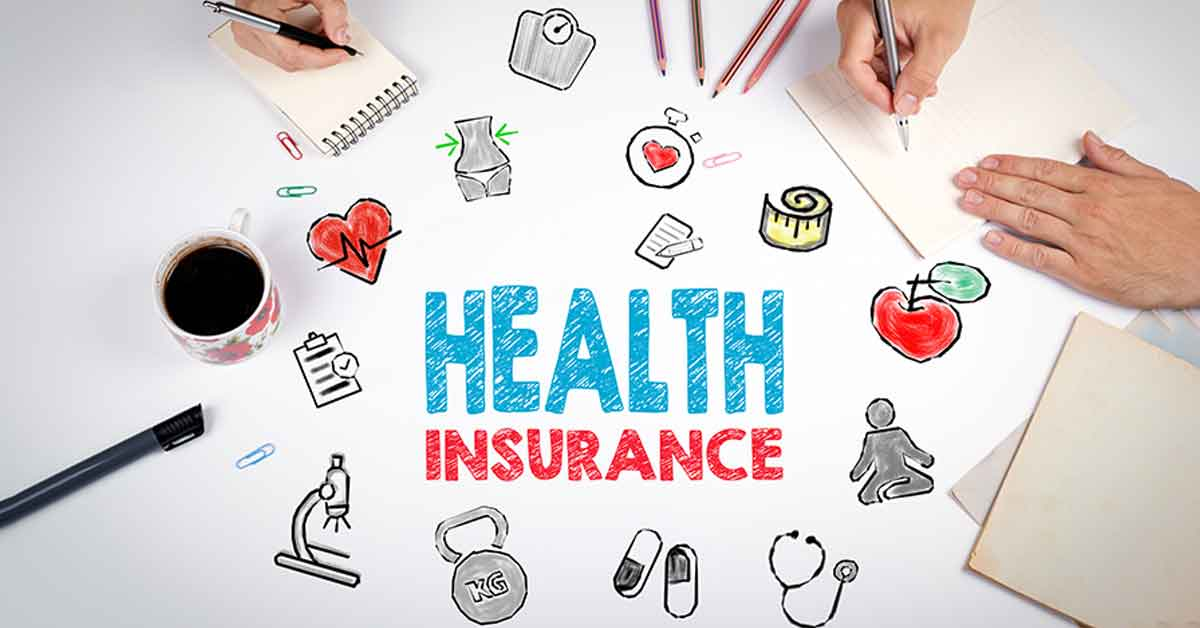

## BUSINESS CASE - To  accurately predict insurance costs?

This notebook contains various ML Models which will be able to predict the posibility of insurance costs.

Pipline of this Model Building :-
- Problem Defination
* Domain analysis
* Basic checks
* EDA
* DATA preprocessing
* Model creation 
* Feature selection
* Model selection
* Hyperparameter tuning
* Model Evaluation
* Conclusion

# 1] PROBLEM DEFINATION
- To predict insurance costs.

# IMPORTING NECESSORY MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('E:/Data mites/INTERNSHIP DETAILS/PRCP-1021-InsCostPred/Data/datasets_13720_18513_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 2] DOMAIN ANALYSIS

- **age:** age of primary beneficiary 
- **sex:** insurance contractor gender, female, male 
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance


# 3] BASIC CHECKS

In [58]:
# checking first five rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
# checking last five rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [60]:
# cheking data types and null value count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### There is no null values present

In [61]:
# checking describe function
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
# checking describe function for categorical features
data.describe(include = 'O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [63]:
data.shape

(1338, 7)

In [64]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [65]:
# checking missing value counts
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 4]  Evaluatory Data Analysis 

we will perform three types of analysis
- Univariate analysis
- Bivariate analysis
- Multivariate analysis

## Univariate Analysis

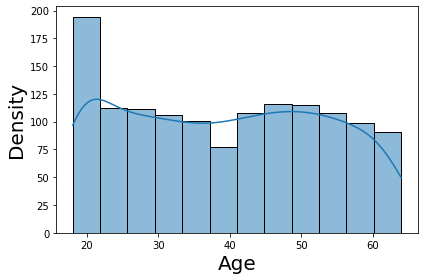

In [66]:
sns.histplot(data['age'],kde=True)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.tight_layout()
plt.show() 

**Data Insights**
- Data set contains more data of people in age band of 18 to 22 years old.
- The Distribution is not normal for Age

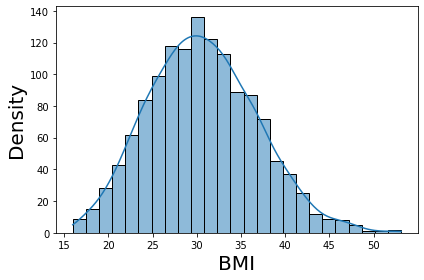

In [67]:
sns.histplot(data['bmi'],kde=True)
plt.xlabel('BMI',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.tight_layout()
plt.show() 

**Data Insights**
- Dataset contains most bmi data in range of 22 to 37
- Distribution is normal for BMI

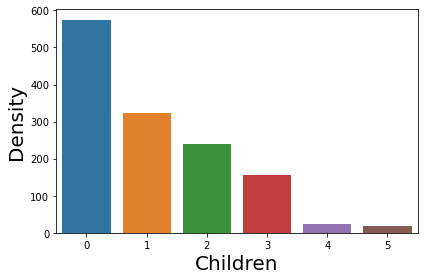

In [68]:
sns.countplot(data['children'])
plt.xlabel('Children',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.tight_layout()
plt.show() 

**Data Insights**
- Most health insurance don't cover childrens.

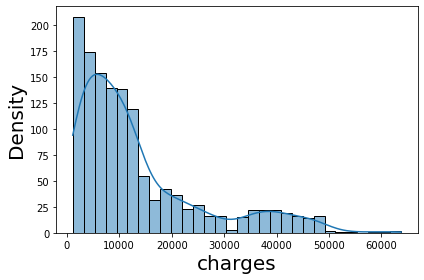

In [69]:
sns.histplot(data['charges'],kde=True)
plt.xlabel('charges',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.tight_layout()
plt.show() 

**Data Insights**
- Most health insurance charges are in between 0 to 15000.

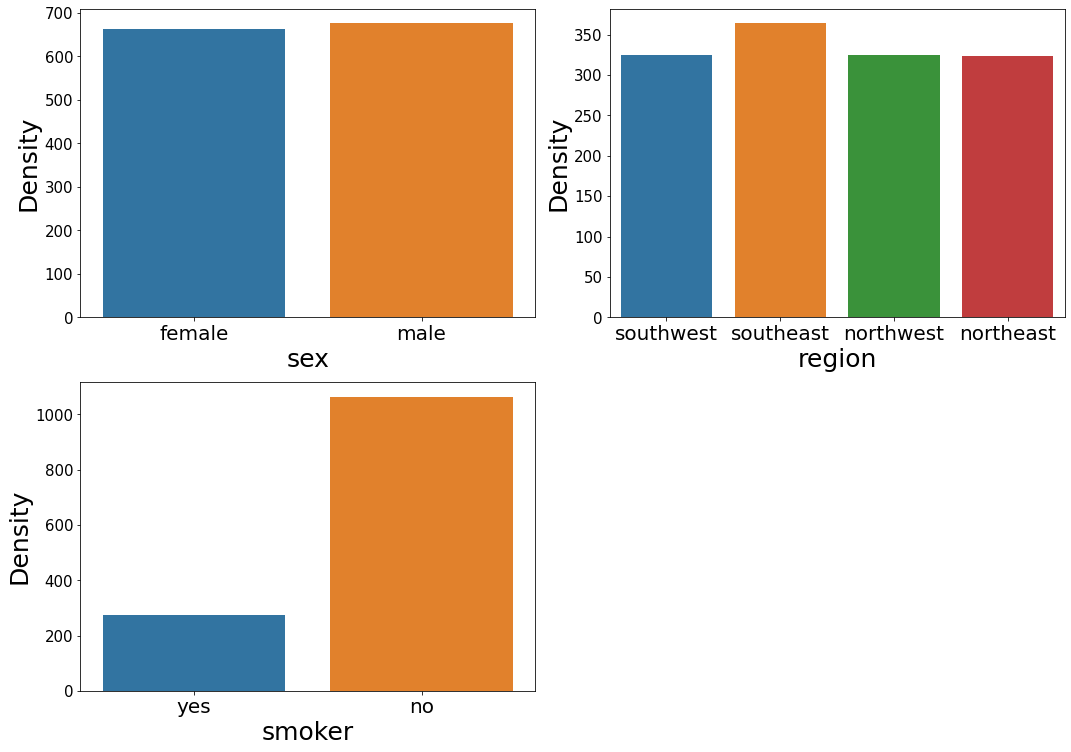

In [70]:
box1 = data[['sex','region','smoker']]
plt.figure(figsize=(15,15))
pltnum=1
for i in box1:
        plt.subplot(3,2,pltnum)
        sns.countplot(x=box1[i])
        plt.xlabel(i,fontsize=25)
        plt.ylabel('Density',fontsize=25)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=15)
        pltnum+=1
plt.tight_layout()
plt.show()  

**Data Insights**
- Data set contains equal amount of females and males data.
- Count of non smoker data is more than smotker.
- Data set contains equal amount of data from all region

## Bivariate analysis

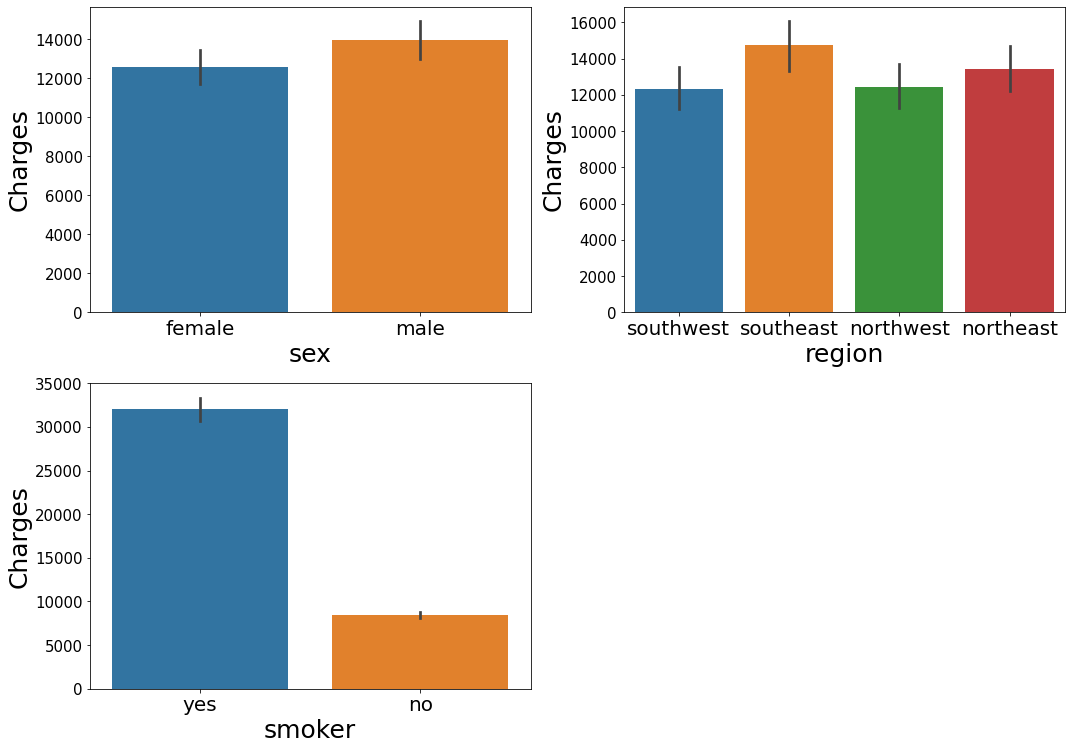

In [71]:
box1 = data[['sex','region','smoker']]
box2 = data[['charges']]
plt.figure(figsize=(15,15))
pltnum=1
for i in box1:
        plt.subplot(3,2,pltnum)
        sns.barplot(x=box1[i],y=data['charges'])
        plt.xlabel(i,fontsize=25)
        plt.ylabel('Charges',fontsize=25)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=15)
        pltnum+=1
plt.tight_layout()
plt.show()  

**Data Insights**
- **What is effect of smoking on insurance chargres?** The health insurance charges costs a lot higher (upto 30000 avg.) for smoker.
- **What is effect of gender on charges?** The health insurance charges are not that biased with gender.
- **What is effect of region on charges?** The health insurance charges are higher for southeast region than other region.

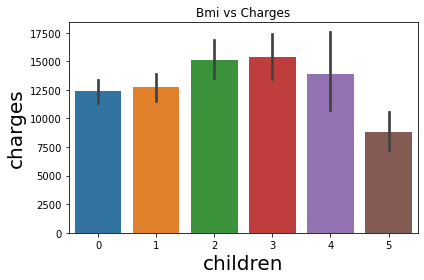

In [72]:
sns.barplot(y = data['charges'], x = data['children'])
plt.xlabel('children',fontsize=20)
plt.ylabel('charges',fontsize=20)
plt.title('Bmi vs Charges')
plt.tight_layout()
plt.show() 

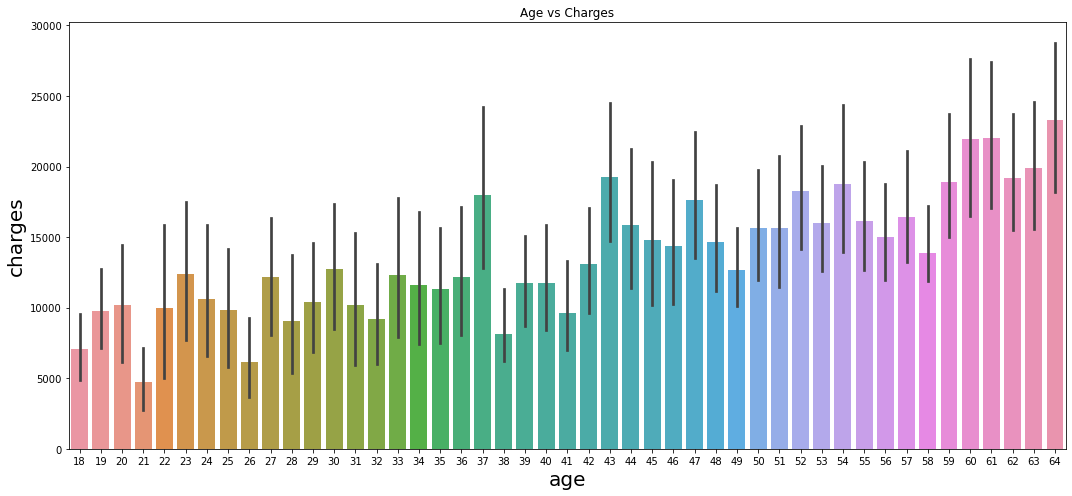

In [73]:
plt.figure(figsize=(15,7))
sns.barplot(y = data['charges'], x = data['age'])
plt.xlabel('age',fontsize=20)
plt.ylabel('charges',fontsize=20)
plt.title('Age vs Charges')
plt.tight_layout()
plt.show() 

Data Insights
- **What is effect of age on charges?** Charges are increases with age.

## Multivariate Analysis

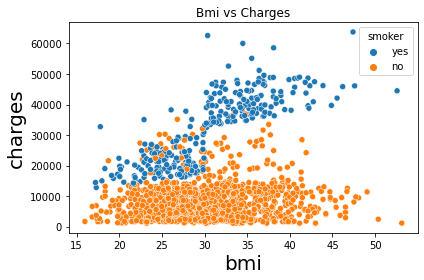

In [74]:
sns.scatterplot(y = data['charges'], x = data['bmi'],hue=data['smoker'])
plt.xlabel('bmi',fontsize=20)
plt.ylabel('charges',fontsize=20)
plt.title('Bmi vs Charges')
plt.tight_layout()
plt.show() 

Data Insights
- **Person with same bmi but having smoking habbit have the higher insurance charges than non smoker.**

# 5] Data Preprocessing

In [75]:
# Checking for null/missing vavlues
data.isnull().sum()*100/len(data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [10]:
## Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.sex=lc.fit_transform(data.sex)
data.smoker=lc.fit_transform(data.smoker)
data.region=lc.fit_transform(data.region)

In [49]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Outlier 

## BMI is having some outliers but assuming that, it is a part of data.

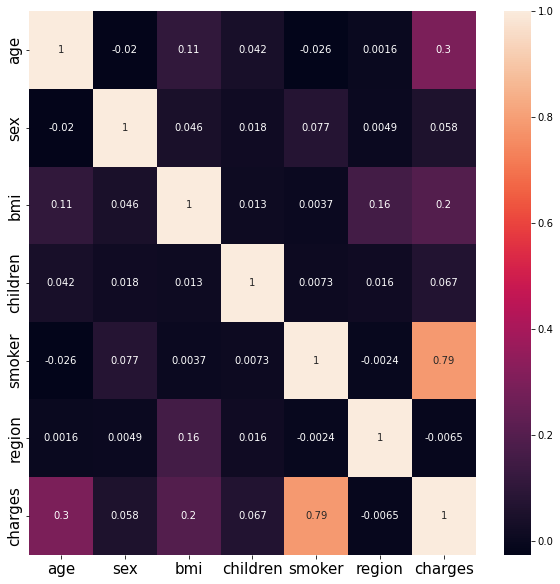

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Checking for duplicate rows.

In [3]:
data.duplicated().sum()

1

In [4]:
data.drop_duplicates(inplace=True)

# 6] Model Building

In [11]:
# Creating X and y variable
X = data.drop(columns = ['charges','region'])
y = data['charges']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=60)

# 7] Feature selection

In [120]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
smoker,0.619
bmi,0.221
age,0.133
children,0.021
sex,0.006


# 8] Model Selection

# Let us compare the Different Machine Learning Models

In [8]:
from sklearn.linear_model import LinearRegression ## Model import
from sklearn.linear_model import Ridge ## Model import
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
import math
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [205]:
Lin_reg = LinearRegression() #Creating object of the algorithm 
Lin_reg.fit(X_train, y_train) #Training the model
y_train_predict_LR=Lin_reg.predict(X_train) 

train_score_linreg=r2_score(y_train,y_train_predict_LR) 
y_test_predict_LR=Lin_reg.predict(X_test)
test_score_linreg=r2_score(y_test,y_test_predict_LR) 
cv_linear_reg = cross_val_score(estimator = Lin_reg, X = X, y = y, cv = 5)
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_test_predict_LR)))
print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(train_score_linreg))
print('R2_score (test) : {0:.3f}'.format(test_score_linreg))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.747
R2_score (train) : 0.754
R2_score (test) : 0.730
RMSE : 6160.588


# Decision Tree

In [207]:
decision_tree = DecisionTreeRegressor() 
decision_tree.fit(X_train, y_train)  
y_train_predict_DT=decision_tree.predict(X_train) 
train_score_DT=r2_score(y_train,y_train_predict_DT) 
Y_pred_DT = decision_tree.predict(X_test)  
test_score_DT=r2_score(y_test,Y_pred_DT) 
cv_DT = cross_val_score(estimator = decision_tree, X = X, y = y, cv = 5)
rmse_DT = (np.sqrt(mean_squared_error(y_test, Y_pred_DT)))
print('CV Linear Regression : {0:.3f}'.format(cv_DT.mean()))
print('R2_score (train) : {0:.3f}'.format(train_score_DT))
print('R2_score (test) : {0:.3f}'.format(test_score_DT))
print('RMSE : {0:.3f}'.format(rmse_DT))

CV Linear Regression : 0.706
R2_score (train) : 0.998
R2_score (test) : 0.724
RMSE : 6230.388


# Random Forest

In [193]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
y_train_predict_RF=random_forest.predict(X_train) 
train_score_RF=r2_score(y_train,y_train_predict_RF) 
Y_pred_RF = random_forest.predict(X_test)  
test_score_RF=r2_score(y_test,Y_pred_RF) 
cv_RF = cross_val_score(estimator = random_forest, X = X, y = y, cv = 5)
rmse_RF = (np.sqrt(mean_squared_error(y_test, Y_pred_RF)))

# SVM

In [194]:
svregressor = SVR() ## base model with default parameters
svregressor.fit(X_train, y_train)
y_train_predict_SVR=svregressor.predict(X_train) 
train_score_SVR=r2_score(y_train,y_train_predict_SVR) 
Y_pred_SVR = svregressor.predict(X_test)  
test_score_SVR=r2_score(y_test,Y_pred_SVR) 

# Gradient boosting

In [195]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_train_predict_gbr=gbr.predict(X_train) 
train_score_gbr=r2_score(y_train,y_train_predict_gbr) 
Y_pred_gbr = gbr.predict(X_test)  
test_score_gbr=r2_score(y_test,Y_pred_gbr)

# KNN

In [196]:
knn = KNeighborsRegressor(n_neighbors = 10) 
knn.fit(X_train, y_train)  
Y_pred_train = knn.predict(X_train)
train_score_KNN=r2_score(y_train,Y_pred_train)
Y_pred = knn.predict(X_test)  
test_score_KNN=r2_score(y_test,Y_pred)


# XGB boosting

In [197]:
from xgboost import XGBRegressor#importing the model library
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train, y_train)# fitting the data
y_train_predict_xgb_r=xgb_r.predict(X_train) 
train_score_xgb_r=r2_score(y_train,y_train_predict_xgb_r) 
Y_pred_xgb_r = xgb_r.predict(X_test)  
test_score_xgb_r=r2_score(y_test,Y_pred_xgb_r)

# ANN

In [26]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=1,
                       random_state=2) ## model object creation max_iter=Stopping parameter
model.fit(X_train,y_train) ## training the data
y_predict_proba = model.predict(X_test) ## predicting the pro
## Probability of class
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
train_score_ann=r2_score(y_train,y_train_predict) 

# Comparing models

In [198]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 
              'Support Vector Machines','Gradient Boosting','Xgb boost','KNN'],
    'R2 Score(training)': [train_score_linreg,train_score_DT,train_score_RF,
                          train_score_SVR,train_score_gbr,train_score_xgb_r,train_score_KNN],
    'R2 Score(testing)': [test_score_linreg,test_score_DT,test_score_RF,
                          test_score_SVR,test_score_gbr,test_score_xgb_r,test_score_KNN]})
results.head(9)

,Model,R2 Score(training),R2 Score(testing)
0,Linear Regression,0.753699,0.729878
1,Decision Tree,0.998348,0.725528
2,Random Forest,0.973825,0.816807
3,Support Vector Machines,-0.087675,-0.128760
4,Gradient Boosting,0.905412,0.846112
5,Xgb boost,0.993718,0.802208
6,KNN,0.867001,0.800604


# Implementing Decision Tree

In [31]:
decision_tree = DecisionTreeRegressor() 
decision_tree.fit(X_train, y_train)  
y_train_predict_DT=decision_tree.predict(X_train) 
train_score_DT=r2_score(y_train,y_train_predict_DT) 
Y_pred_DT = decision_tree.predict(X_test)  
test_score_DT=r2_score(y_test,Y_pred_DT) 
cv_DT2 = cross_val_score(estimator = decision_tree, X = X, y = y, cv = 5)
rmse_DT = (np.sqrt(mean_squared_error(y_test, Y_pred_DT)))

In [32]:
test_adjusted_r2 = 1-((1-test_score_DT)*(268-1))/(268-5-1)

In [30]:
print("The Cross validation score is :",((cv_DT2.mean())*100),"%")
print("The Training Accuracy using R2 is :",(train_score_DT*100),"%")
print("The Testing Accuracy using R2 is :",(test_score_DT*100),"%")
print("The Accuracy using Adjusted R2 is :",(test_adjusted_r2*100),"%")
print("The mean squared error (MSE) is:",mean_squared_error(y_test,Y_pred_DT))
print("The root mean squared error (RMSE) is:",math.sqrt(mean_squared_error(y_test,Y_pred_DT))) 
print("The mean absolute error (MAE) is:",mean_absolute_error(y_test,Y_pred_DT))

The Cross validation score is : 70.49013008569587 %
The Training Accuracy using R2 is : 99.83480617579642 %
The Testing Accuracy using R2 is : 72.91620958807728 %
The Accuracy using Adjusted R2 is : 72.3993433588421 %
The mean squared error (MSE) is: 38053472.285237625
The root mean squared error (RMSE) is: 6168.7496533120575
The mean absolute error (MAE) is: 2893.5826956716423


# Hyperparameter Tuning

In [24]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("squared_error", "friedman_mse", "absolute_error"), #quality of split
    "splitter":("best", "random"),  # searches the features for a split
    "max_depth":(list(range(1, 20))),  #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],     #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20))
}



tree_clf = DecisionTreeRegressor(random_state=3)  #object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=2, cv=3)

tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_ #it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 6498 candidates, totalling 19494 fits
Best paramters: {'criterion': 'friedman_mse', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'})


In [35]:
DT2=DecisionTreeRegressor(criterion='friedman_mse', max_depth= 6, min_samples_leaf= 9, min_samples_split= 2, splitter= 'best')
DT2.fit(X_train, y_train)#training 
y_predict_DT2=DT2.predict(X_test)#testing
test_score_DT2=r2_score(y_test,y_predict_DT2)
y_pred_DT2=DT2.predict(X_train)#testing
train_score_DT2=r2_score(y_train,y_pred_DT2)

In [36]:
cv_DT2 = cross_val_score(estimator = DT2, X = X, y = y, cv = 5)
rmse_DT2 = (np.sqrt(mean_squared_error(y_test, y_predict_DT2)))
test_adjusted_r2 = 1-((1-test_score_DT2)*(268-1))/(268-5-1)

# 9] Model Evaluation

In [38]:
print("The Cross validation score is :",((cv_DT2.mean())*100),"%")
print("The Training Accuracy using R2 is :",(train_score_DT*100),"%")
print("The Testing Accuracy using R2 is :",(test_score_DT2*100),"%")
print("The Accuracy using Adjusted R2 is :",(test_adjusted_r2*100),"%")
print("The mean squared error (MSE) is:",mean_squared_error(y_test,y_predict_DT2))
print("The root mean squared error (RMSE) is:",math.sqrt(mean_squared_error(y_test,y_predict_DT2))) 
print("The mean absolute error (MAE) is:",mean_absolute_error(y_test,y_predict_DT2))

The Cross validation score is : 84.76080174665161 %
The Training Accuracy using R2 is : 99.83480617579642 %
The Testing Accuracy using R2 is : 83.42104660494162 %
The Accuracy using Adjusted R2 is : 83.10465436457793 %
The mean squared error (MSE) is: 23293886.63631709
The root mean squared error (RMSE) is: 4826.374067176837
The mean absolute error (MAE) is: 2640.0153996449358


# Implementing Gradient boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [58]:
y_train_predict_gbr=gbr.predict(X_train)
train_score_gbr=r2_score(y_train,y_train_predict_gbr)
Y_pred_gbr = gbr.predict(X_test)  
test_score_gbr=r2_score(y_test,Y_pred_gbr)
cv_GB = cross_val_score(estimator = gbr, X = X, y = y, cv = 5)

In [59]:
X_test.shape

(268, 5)

In [60]:
test_adjusted_r2 = 1-((1-test_score_gbr)*(268-1))/(268-5-1)

In [61]:
print("The Cross Validation score is :",((cv_GB.mean())*100),"%")
print("The Training Accuracy using R2 is :",(train_score_gbr*100),"%")
print("The Testing Accuracy using R2 is :",(test_score_gbr*100),"%")
print("The Accuracy using Adjusted R2 is :",(test_adjusted_r2*100),"%")
print("The mean squared error (MSE) is:",mean_squared_error(y_test,Y_pred_gbr))
print("The root mean squared error (RMSE) is:",math.sqrt(mean_squared_error(y_test,Y_pred_gbr))) 
print("The mean absolute error (MAE) is:",mean_absolute_error(y_test,Y_pred_gbr))

The Cross Validation score is : 85.43834611150785 %
The Training Accuracy using R2 is : 90.54116021010205 %
The Testing Accuracy using R2 is : 84.61123080086178 %
The Accuracy using Adjusted R2 is : 84.3175519993515 %
The mean squared error (MSE) is: 21621645.025193226
The root mean squared error (RMSE) is: 4649.908066316282
The mean absolute error (MAE) is: 2457.4880573310566


# Hyper parameter tuning

In [18]:
from sklearn.model_selection import GridSearchCV

In [21]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
           'n_estimators': [50,65,80,100,115,130,150,500],
           'learning_rate':[0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
            'subsample':[.5],'max_depth':[5,1,6,7,8,9,10,11,12,13,14],
            'random_state':[1]}

tree_clf = GradientBoostingRegressor(random_state=3)  #object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="neg_mean_squared_error",  cv=5, n_jobs=1)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods
tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_ #it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'learning_rate': 0.06, 'max_depth': 5, 'n_estimators': 50, 'random_state': 1, 'subsample': 0.5})


In [55]:
GB2=GradientBoostingRegressor(learning_rate= 0.06, max_depth=5, n_estimators= 50, random_state=1, subsample= 0.5)
GB2.fit(X_train, y_train)#training 
y_predict_GB2=GB2.predict(X_test)#testing
Y_predict_GB2=GB2.predict(X_train)#testing
test_score_gbr2=r2_score(y_test,y_predict_GB2)
train_score_gbr2=r2_score(y_train,Y_predict_GB2)

In [54]:
cv_GB2= cross_val_score(estimator = GB2, X = X, y = y, cv = 5)
test_adjusted_r22 = 1-((1-test_score_gbr2)*(268-1))/(268-5-1)

In [41]:
print("The Testing Accuracy using R2 is :",(test_score_gbr2*100),"%")

The Testing Accuracy using R2 is : 83.23023503639682 %


In [56]:
print("The Cross Validation score is :",((cv_GB2.mean())*100),"%")
print("The Training Accuracy using R2 is :",(train_score_gbr2*100),"%")
print("The Testing Accuracy using R2 is :",(test_score_gbr2*100),"%")
print("The Accuracy using Adjusted R2 is :",(test_adjusted_r22*100),"%")
print("The mean squared error (MSE) is:",mean_squared_error(y_test,y_predict_GB2))
print("The root mean squared error (RMSE) is:",math.sqrt(mean_squared_error(y_test,y_predict_GB2))) 
print("The mean absolute error (MAE) is:",mean_absolute_error(y_test,y_predict_GB2))

The Cross Validation score is : 84.92780274661442 %
The Training Accuracy using R2 is : 91.66884920085182 %
The Testing Accuracy using R2 is : 83.23023503639682 %
The Accuracy using Adjusted R2 is : 82.9102013538853 %
The mean squared error (MSE) is: 23561982.151194736
The root mean squared error (RMSE) is: 4854.068618303077
The mean absolute error (MAE) is: 2713.5648032525114


# 10] Conclusion

# By Decision Tree we are getting 

- The Cross validation score is : 84.76080174665161 %
- The Training Accuracy using R2 is : 99.83480617579642 %
- The Testing Accuracy using R2 is : 83.42104660494162 %
- The Accuracy using Adjusted R2 is : 83.10465436457793 %
- The mean squared error (MSE) is: 23293886.63631709
- The root mean squared error (RMSE) is: 4826.374067176837
- The mean absolute error (MAE) is: 2640.0153996449358

# By Gradient boosting ensembling technique we are getting 
- The Cross Validation score is : 84.92780274661442 %
- The Training Accuracy using R2 is : 91.66884920085182 %
- The Testing Accuracy using R2 is : 83.23023503639682 %
- The Accuracy using Adjusted R2 is : 82.9102013538853 %
- The mean squared error (MSE) is: 23561982.151194736
- The root mean squared error (RMSE) is: 4854.068618303077
- The mean absolute error (MAE) is: 2713.5648032525114

# Decision Tree model is giving higher score